In [277]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


In [278]:
# data = pd.read_csv("39-features-tarcutta-denoised-spectral.csv")
# data

In [279]:
# features = data.iloc[:, 0:39].values
# labels_true = data["class"]

In [280]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report

In [281]:
# Load dataset
df = pd.read_csv("39-features-wambiana-denoised-spectral.csv")
X = df.iloc[:, 0:39]
# y = df.iloc[:, 40]
y = df['class']
feature_names = list(X.columns)

In [282]:
X

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,0.082471,0.454871,0.796889,0.506489,0.627111,0.696046,0.539483,0.364474,0.496595,0.448717,...,0.561243,0.544736,0.572599,0.543869,0.543449,0.544676,0.530545,0.547511,0.533520,0.533833
1,0.171055,0.443470,0.693785,0.653337,0.713298,0.512147,0.649591,0.571522,0.375469,0.418963,...,0.508726,0.479506,0.479252,0.484989,0.489986,0.474562,0.457659,0.472592,0.463132,0.471789
2,0.083777,0.471251,0.792655,0.505085,0.659196,0.666593,0.571229,0.365247,0.504377,0.498317,...,0.520291,0.510312,0.534212,0.502860,0.503908,0.509764,0.494602,0.506292,0.491481,0.500346
3,0.088650,0.460130,0.798181,0.507931,0.645169,0.692779,0.554799,0.389404,0.514831,0.481564,...,0.517083,0.504563,0.528218,0.498525,0.507203,0.509242,0.488890,0.502445,0.490087,0.499047
4,0.092463,0.481952,0.809069,0.513986,0.663942,0.657764,0.568602,0.354599,0.466197,0.461292,...,0.559594,0.538403,0.563334,0.538012,0.542690,0.540921,0.522831,0.540497,0.525703,0.531817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2071,0.171812,0.682472,0.607981,0.384563,0.409399,0.324260,0.629749,0.244724,0.386684,0.646414,...,0.773141,0.748791,0.766815,0.759629,0.754731,0.750586,0.753715,0.753848,0.755783,0.752733
2072,0.230628,0.737007,0.615823,0.425049,0.407289,0.355502,0.619014,0.177882,0.392098,0.602706,...,0.744142,0.704067,0.726643,0.719312,0.721828,0.722681,0.712623,0.711915,0.717073,0.713258
2073,0.216930,0.728404,0.605230,0.426588,0.439569,0.323748,0.593072,0.153196,0.332621,0.632632,...,0.738796,0.709324,0.726676,0.716697,0.714080,0.714041,0.720629,0.716306,0.714667,0.716235
2074,0.197193,0.705339,0.621347,0.452494,0.428704,0.332111,0.561994,0.084713,0.318238,0.588321,...,0.782646,0.754063,0.774271,0.766952,0.766182,0.759707,0.758079,0.757029,0.763490,0.762742


In [283]:
y

0       anthrophony
1       anthrophony
2       anthrophony
3       anthrophony
4       anthrophony
           ...     
2071          other
2072          other
2073          other
2074          other
2075          other
Name: class, Length: 2076, dtype: object

In [284]:
# df = pd.read_csv("39-features-wambiana.csv")
# df = df.dropna()
# X = df.iloc[:, 0:13]
# X

In [285]:
# y = df.iloc[:, 40]
# y

In [286]:
target_names = list(y.unique())
target_names

['anthrophony', 'biophony', 'geophony', 'other']

In [287]:
from sklearn.manifold import TSNE
X = TSNE(n_components=3, learning_rate=150, perplexity=50, verbose=2, angle=0.1, random_state=0).fit_transform(X)

c:\Users\Thomas\conda\envs\audiohandling\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 2076 samples in 0.000s...
[t-SNE] Computed neighbors for 2076 samples in 0.089s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2076
[t-SNE] Computed conditional probabilities for sample 2000 / 2076
[t-SNE] Computed conditional probabilities for sample 2076 / 2076
[t-SNE] Mean sigma: 0.100171
[t-SNE] Computed conditional probabilities in 0.062s
[t-SNE] Iteration 50: error = 67.0348740, gradient norm = 0.0421215 (50 iterations in 0.531s)
[t-SNE] Iteration 100: error = 61.8116989, gradient norm = 0.0013221 (50 iterations in 0.430s)
[t-SNE] Iteration 150: error = 61.7755547, gradient norm = 0.0007031 (50 iterations in 0.427s)
[t-SNE] Iteration 200: error = 61.7728882, gradient norm = 0.0002919 (50 iterations in 0.431s)
[t-SNE] Iteration 250: error = 61.7719765, gradient norm = 0.0002441 (50 iterations in 0.403s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.771976
[t-SNE] Iteration 300: err

In [288]:
# import umap

# X = umap.UMAP(n_components=3, random_state=0, n_neighbors=6,
#             min_dist=0.1).fit_transform(X)

In [289]:
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler

# # Prepare and scale the data
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Create a PCA instance
# pca = PCA(n_components=7)

# # Fit the data to PCA
# pca.fit(X_scaled)

# # Transform the data to the new PCA space
# X = pca.transform(X_scaled)

In [290]:
# from sklearn.neural_network import MLPClassifier
# from sklearn.model_selection import GridSearchCV

# # Define your MLPClassifier
# clf = MLPClassifier()

# # Define the parameter grid for grid search
# param_grid = {
#     'hidden_layer_sizes': [(5,), (10,), (5, 2), (10, 5), (5, 5, 2)]
# }

# # Create the GridSearchCV object
# grid_search = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy')

# # Fit the grid search to your training data
# grid_search.fit(X, y)

# # Print the best parameters and best score
# print("Best Parameters:", grid_search.best_params_)
# print("Best Score:", grid_search.best_score_)


In [291]:
# from sklearn.model_selection import cross_validate, cross_val_predict
# from sklearn.metrics import confusion_matrix, classification_report
# from sklearn.neural_network import MLPClassifier
# import seaborn as sns
# import matplotlib.pyplot as plt

# classifiers = {
#     'ANN': MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(10, 10)),
# }

# scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

# for name, clf in classifiers.items():
#     if name == 'ANN':
#         # Add your input features and target variable to X and y respectively
#         cv_results = cross_validate(clf, X, y, cv=10, scoring=scoring, return_estimator=True)
#         print(cv_results)
#         acc = cv_results['test_accuracy'].mean()
#         precision = cv_results['test_precision_macro'].mean()
#         recall = cv_results['test_recall_macro'].mean()
#         f1 = cv_results['test_f1_macro'].mean()
#         print(f"{name}: Accuracy={acc:.4f}, Precision={precision:.4f}, Recall={recall:.4f}, F1-Score={f1:.4f}")

#         y_pred = cross_val_predict(clf, X, y, cv=10)
#         cm = confusion_matrix(y, y_pred)
#         plt.figure()
#         sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
#         plt.xlabel('Predicted label')
#         plt.ylabel('True label')
#         plt.show()

#         # There is no need to generate decision tree diagram or feature importance for ANN
#     else:
#         continue  # Skip other classifiers

#     print(classification_report(y, y_pred, target_names=target_names))


{'fit_time': array([0.01699901, 0.01000023, 0.01000023, 0.00949979, 0.01050043,
       0.00900054, 0.00900078, 0.00950027, 0.00950003, 0.00800014]), 'score_time': array([0.00499988, 0.00549984, 0.00499964, 0.00550008, 0.00500011,
       0.00649953, 0.00449896, 0.00449967, 0.00500035, 0.00449967]), 'test_accuracy': array([0.90384615, 0.94711538, 0.96634615, 0.96153846, 0.98076923,
       0.96634615, 0.88405797, 0.91304348, 0.96618357, 0.80193237]), 'test_precision_macro': array([0.93561158, 0.95996969, 0.97213439, 0.96721311, 0.98257488,
       0.96305238, 0.83540164, 0.9316597 , 0.9712019 , 0.75120092]), 'test_recall_macro': array([0.79811508, 0.89756476, 0.93353175, 0.92956349, 0.98460478,
       0.95918918, 0.84585395, 0.83220109, 0.92391304, 0.74288206]), 'test_f1_macro': array([0.79950065, 0.91710918, 0.94814134, 0.9427096 , 0.98333091,
       0.96040422, 0.8357915 , 0.84689027, 0.94019047, 0.73276749])}
SVM: Accuracy=0.9291, Precision=0.9270, Recall=0.8847, F1-Score=0.8907


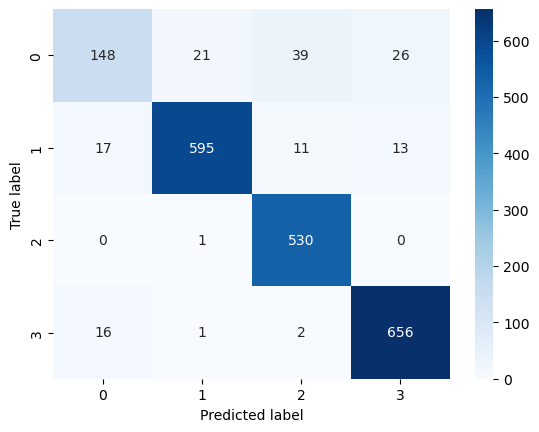

              precision    recall  f1-score   support

 anthrophony       0.82      0.63      0.71       234
    biophony       0.96      0.94      0.95       636
    geophony       0.91      1.00      0.95       531
       other       0.94      0.97      0.96       675

    accuracy                           0.93      2076
   macro avg       0.91      0.88      0.89      2076
weighted avg       0.93      0.93      0.93      2076

{'fit_time': array([0.00250006, 0.0025003 , 0.00199986, 0.00200057, 0.00249863,
       0.00199986, 0.00200033, 0.00200224, 0.00199986, 0.00250053]), 'score_time': array([0.00150084, 0.00149965, 0.00149941, 0.00199962, 0.00150013,
       0.00149989, 0.00149965, 0.00149822, 0.00150013, 0.00149918]), 'test_accuracy': array([0.97115385, 0.89903846, 0.94230769, 0.95673077, 0.97596154,
       0.94230769, 0.81642512, 0.92270531, 0.97101449, 0.8115942 ]), 'test_precision_macro': array([0.96826682, 0.87720779, 0.92855942, 0.94547791, 0.97341524,
       0.91957672, 0.7

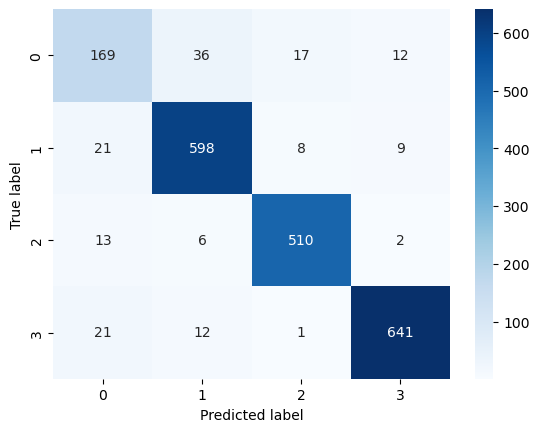

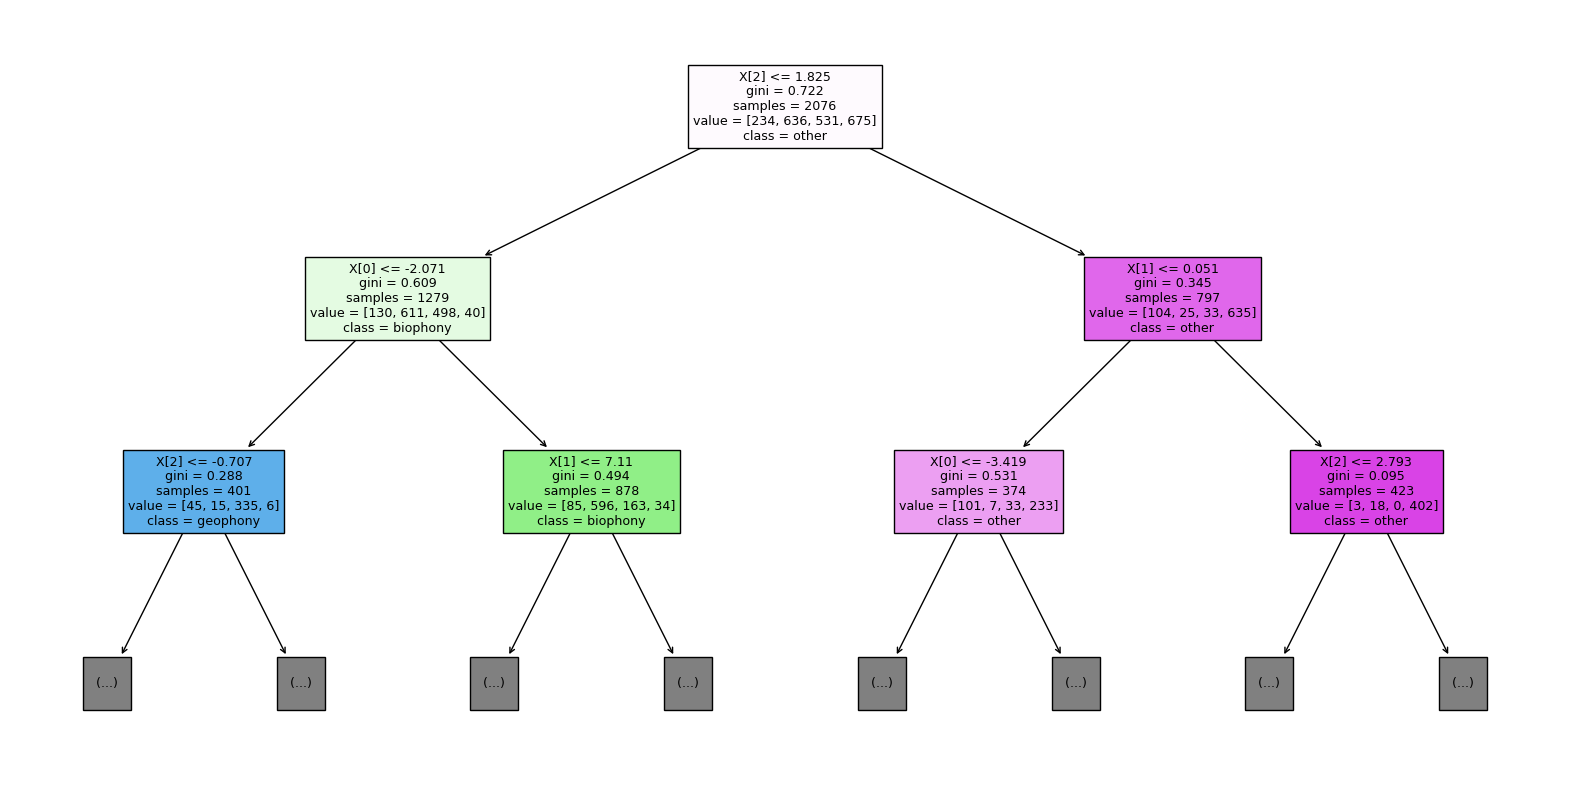

Feature importances: [0.31668257 0.24436682 0.4389506 ]
              precision    recall  f1-score   support

 anthrophony       0.75      0.72      0.74       234
    biophony       0.92      0.94      0.93       636
    geophony       0.95      0.96      0.96       531
       other       0.97      0.95      0.96       675

    accuracy                           0.92      2076
   macro avg       0.90      0.89      0.89      2076
weighted avg       0.92      0.92      0.92      2076



c:\Users\Thomas\conda\envs\audiohandling\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Thomas\conda\envs\audiohandling\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Thomas\conda\envs\audiohandling\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Thomas\conda\envs\audiohandling\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users

{'fit_time': array([0.34400034, 0.33999944, 0.34499979, 0.33649945, 0.33949924,
       0.33999991, 0.35100007, 0.34850001, 0.34099936, 0.3375001 ]), 'score_time': array([0.00149941, 0.00150013, 0.00150037, 0.00200081, 0.00150013,
       0.00199986, 0.00200105, 0.0015018 , 0.00149989, 0.00149989]), 'estimator': [MLPClassifier(alpha=1e-05, hidden_layer_sizes=(10, 10)), MLPClassifier(alpha=1e-05, hidden_layer_sizes=(10, 10)), MLPClassifier(alpha=1e-05, hidden_layer_sizes=(10, 10)), MLPClassifier(alpha=1e-05, hidden_layer_sizes=(10, 10)), MLPClassifier(alpha=1e-05, hidden_layer_sizes=(10, 10)), MLPClassifier(alpha=1e-05, hidden_layer_sizes=(10, 10)), MLPClassifier(alpha=1e-05, hidden_layer_sizes=(10, 10)), MLPClassifier(alpha=1e-05, hidden_layer_sizes=(10, 10)), MLPClassifier(alpha=1e-05, hidden_layer_sizes=(10, 10)), MLPClassifier(alpha=1e-05, hidden_layer_sizes=(10, 10))], 'test_accuracy': array([0.99038462, 0.91826923, 0.94230769, 0.96634615, 0.97596154,
       0.94711538, 0.87922705, 0

c:\Users\Thomas\conda\envs\audiohandling\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Thomas\conda\envs\audiohandling\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Thomas\conda\envs\audiohandling\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Thomas\conda\envs\audiohandling\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users

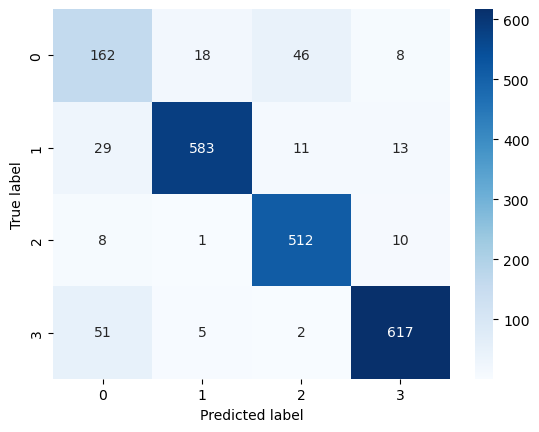

              precision    recall  f1-score   support

 anthrophony       0.65      0.69      0.67       234
    biophony       0.96      0.92      0.94       636
    geophony       0.90      0.96      0.93       531
       other       0.95      0.91      0.93       675

    accuracy                           0.90      2076
   macro avg       0.86      0.87      0.87      2076
weighted avg       0.91      0.90      0.90      2076

{'fit_time': array([0.00099993, 0.00149989, 0.00150132, 0.0010004 , 0.00099969,
       0.0009501 , 0.0010004 , 0.00100017, 0.00099945, 0.00099945]), 'score_time': array([0.00350022, 0.00300002, 0.00299788, 0.00350022, 0.00349975,
       0.0034976 , 0.00349951, 0.00350046, 0.0035007 , 0.0030005 ]), 'test_accuracy': array([0.97596154, 0.95192308, 0.95673077, 0.99519231, 0.98557692,
       0.96153846, 0.9468599 , 0.96135266, 0.99033816, 0.84057971]), 'test_precision_macro': array([0.98194724, 0.96468813, 0.96522708, 0.99      , 0.98049242,
       0.94828947, 0.9

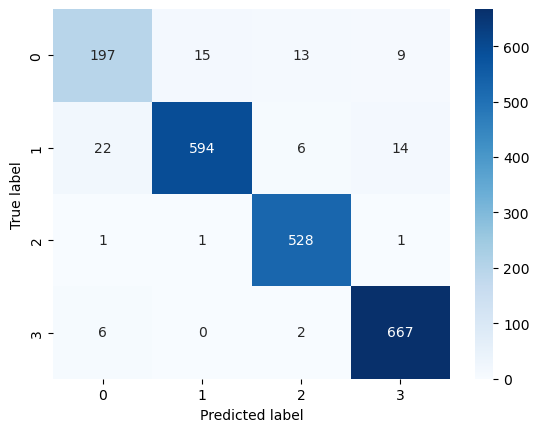

              precision    recall  f1-score   support

 anthrophony       0.87      0.84      0.86       234
    biophony       0.97      0.93      0.95       636
    geophony       0.96      0.99      0.98       531
       other       0.97      0.99      0.98       675

    accuracy                           0.96      2076
   macro avg       0.94      0.94      0.94      2076
weighted avg       0.96      0.96      0.96      2076

{'fit_time': array([0.00100017, 0.00049996, 0.00099969, 0.0010004 , 0.00100017,
       0.00099969, 0.00099969, 0.00100064, 0.00099993, 0.00101161]), 'score_time': array([0.00149989, 0.00150037, 0.00149989, 0.00149965, 0.00149989,
       0.00150061, 0.00150037, 0.00149918, 0.00149989, 0.00148845]), 'test_accuracy': array([0.82692308, 0.70673077, 0.77403846, 0.84134615, 0.85576923,
       0.83173077, 0.70048309, 0.87439614, 0.92270531, 0.80193237]), 'test_precision_macro': array([0.69576409, 0.57658407, 0.69417989, 0.891439  , 0.77915561,
       0.7509264 , 0.6

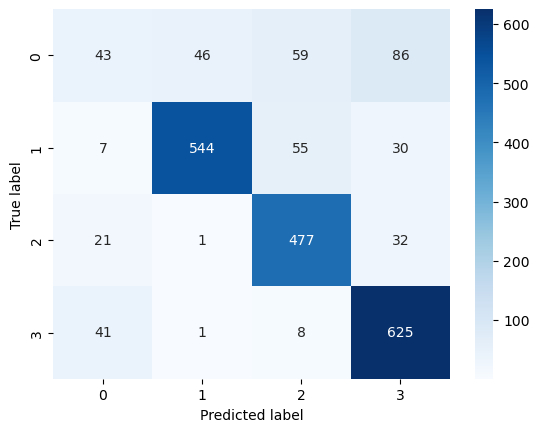

              precision    recall  f1-score   support

 anthrophony       0.38      0.18      0.25       234
    biophony       0.92      0.86      0.89       636
    geophony       0.80      0.90      0.84       531
       other       0.81      0.93      0.86       675

    accuracy                           0.81      2076
   macro avg       0.73      0.72      0.71      2076
weighted avg       0.79      0.81      0.80      2076



In [292]:
from sklearn import svm, tree
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
import matplotlib.pyplot as plt

classifiers = {
    'SVM': svm.SVC(),
    'DT': tree.DecisionTreeClassifier(),
    'ANN': MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(10, 10)),
    'kNN': KNeighborsClassifier(n_neighbors=5),
    'Bayes': GaussianNB()
}

scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

for name, clf in classifiers.items():
    if name == 'ANN':
        # Add your input features and target variable to X and y respectively
        cv_results = cross_validate(clf, X, y, cv=10, scoring=scoring, return_estimator=True)
        print(cv_results)
        acc = cv_results['test_accuracy'].mean()
        precision = cv_results['test_precision_macro'].mean()
        recall = cv_results['test_recall_macro'].mean()
        f1 = cv_results['test_f1_macro'].mean()
        print(f"{name}: Accuracy={acc:.4f}, Precision={precision:.4f}, Recall={recall:.4f}, F1-Score={f1:.4f}")

        y_pred = cross_val_predict(clf, X, y, cv=10)
        cm = confusion_matrix(y, y_pred)
        plt.figure()
        sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
        plt.xlabel('Predicted label')
        plt.ylabel('True label')
        plt.show()

        # There is no need to generate decision tree diagram or feature importance for ANN
    else:
        cv_results = cross_validate(clf, X, y, cv=10, scoring=scoring)
        print(cv_results)
        acc = cv_results['test_accuracy'].mean()
        precision = cv_results['test_precision_macro'].mean()
        recall = cv_results['test_recall_macro'].mean()
        f1 = cv_results['test_f1_macro'].mean()
        print(f"{name}: Accuracy={acc:.4f}, Precision={precision:.4f}, Recall={recall:.4f}, F1-Score={f1:.4f}")

        y_pred = cross_val_predict(clf, X, y, cv=10)
        cm = confusion_matrix(y, y_pred)
        plt.figure()
        sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
        plt.xlabel('Predicted label')
        plt.ylabel('True label')
        plt.show()
        # Generate decision tree diagram and feature importance for DT classifier
        if name == 'DT':
            clf.fit(X, y)  # Fit the model before accessing feature importances
            plt.figure(figsize=(20, 10))
            plot_tree(clf, filled=True, class_names=target_names, max_depth=2)
            plt.show()
            print(f"Feature importances: {clf.feature_importances_}")

    print(classification_report(y, y_pred, target_names=target_names))


In [293]:
# from sklearn import svm, tree
# from sklearn.model_selection import cross_validate
# from sklearn.metrics import confusion_matrix, classification_report
# import seaborn as sns
# import matplotlib.pyplot as plt

# classifiers = {
#     'SVM': svm.SVC(),
#     'DT': tree.DecisionTreeClassifier(),
#     'ANN': MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2)),
#     'kNN': KNeighborsClassifier(n_neighbors=5),
#     'Bayes': GaussianNB()
# }

# scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

# for name, clf in classifiers.items():
#     cv_results = cross_validate(clf, X, y, cv=10, scoring=scoring)
#     print(cv_results)
#     acc = cv_results['test_accuracy'].mean()
#     precision = cv_results['test_precision_macro'].mean()
#     recall = cv_results['test_recall_macro'].mean()
#     f1 = cv_results['test_f1_macro'].mean()
#     print(f"{name}: Accuracy={acc:.4f}, Precision={precision:.4f}, Recall={recall:.4f}, F1-Score={f1:.4f}")

#     y_pred = cross_val_predict(clf, X, y, cv=10)
#     cm = confusion_matrix(y, y_pred)
#     plt.figure()
#     sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
#     plt.xlabel('Predicted label')
#     plt.ylabel('True label')
#     plt.show()
#     # Generate decision tree diagram and feature importance for DT classifier
#     if name == 'DT':
#         clf.fit(X, y)  # Fit the model before accessing feature importances
#         plt.figure(figsize=(20, 10))
#         plot_tree(clf, filled=True, class_names=target_names, max_depth=2)
#         plt.show()
#         print(f"Feature importances: {clf.feature_importances_}")
    
#     print(classification_report(y, y_pred, target_names=target_names))

In [294]:
# from sklearn import svm, tree
# from sklearn.model_selection import cross_validate, cross_val_predict
# from sklearn.metrics import confusion_matrix, classification_report
# from sklearn.neural_network import MLPClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB
# from imblearn.over_sampling import RandomOverSampler
# from imblearn.under_sampling import RandomUnderSampler
# import seaborn as sns
# import matplotlib.pyplot as plt

# classifiers = {
#     'SVM': svm.SVC(),
#     'DT': tree.DecisionTreeClassifier(),
#     'ANN': MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(10, 10)),
#     'kNN': KNeighborsClassifier(n_neighbors=5),
#     'Bayes': GaussianNB()
# }

# scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

# oversampler = RandomOverSampler(random_state=42)
# undersampler = RandomUnderSampler(random_state=42)

# for name, clf in classifiers.items():
#     if name == 'ANN':
#         # Add your input features and target variable to X and y respectively
#         X_resampled, y_resampled = oversampler.fit_resample(X, y)
#         cv_results = cross_validate(clf, X_resampled, y_resampled, cv=10, scoring=scoring, return_estimator=True)
#         print(cv_results)
#         acc = cv_results['test_accuracy'].mean() * 100
#         precision = cv_results['test_precision_macro'].mean() * 100
#         recall = cv_results['test_recall_macro'].mean() * 100
#         f1 = cv_results['test_f1_macro'].mean() * 100
#         print(f"{name}: Accuracy={acc:.4f}, Precision={precision:.4f}, Recall={recall:.4f}, F1-Score={f1:.4f}")

#         y_pred = cross_val_predict(clf, X_resampled, y_resampled, cv=10)
#         cm = confusion_matrix(y_resampled, y_pred)
#         plt.figure()
#         sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
#         plt.xlabel('Predicted label')
#         plt.ylabel('True label')
#         plt.show()

#         # There is no need to generate a decision tree diagram or feature importance for ANN
#     else:
#         X_resampled, y_resampled = oversampler.fit_resample(X, y)
#         X_resampled, y_resampled = undersampler.fit_resample(X_resampled, y_resampled)
#         cv_results = cross_validate(clf, X_resampled, y_resampled, cv=10, scoring=scoring)
#         print(cv_results)
#         acc = cv_results['test_accuracy'].mean() * 100
#         precision = cv_results['test_precision_macro'].mean() * 100
#         recall = cv_results['test_recall_macro'].mean() * 100
#         f1 = cv_results['test_f1_macro'].mean() * 100
#         print(f"{name}: Accuracy={acc:.4f}, Precision={precision:.4f}, Recall={recall:.4f}, F1-Score={f1:.4f}")

#         y_pred = cross_val_predict(clf, X_resampled, y_resampled, cv=10)
#         cm = confusion_matrix(y_resampled, y_pred)
#         plt.figure()
#         sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
#         plt.xlabel('Predicted label')
#         plt.ylabel('True label')
#         plt.show()

#         # Generate decision tree diagram and feature importance for DT classifier
#         if name == 'DT':
#             clf.fit(X_resampled, y_resampled)  # Fit the model before accessing feature importances
#             plt.figure(figsize=(20, 10))
#             plot_tree(clf, filled=True, class_names=target_names, max_depth=2)
#             plt.show()
#             print(f"Feature importances: {clf.feature_importances_}")

#     print(classification_report(y_resampled, y_pred, target_names=target_names))


In [295]:
# from sklearn import svm, tree
# from sklearn.metrics import confusion_matrix, classification_report
# from sklearn.neural_network import MLPClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB
# from imblearn.over_sampling import SMOTE
# import seaborn as sns
# import matplotlib.pyplot as plt

# classifiers = {
#     'SVM': svm.SVC(),
#     'DT': tree.DecisionTreeClassifier(),
#     'ANN': MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(10, 10)),
#     'kNN': KNeighborsClassifier(n_neighbors=5),
#     'Bayes': GaussianNB()
# }

# scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

# for name, clf in classifiers.items():
#     if name == 'ANN':
#         # Add your input features and target variable to X and y respectively
#         smote = SMOTE(random_state=42)
#         X_resampled, y_resampled = smote.fit_resample(X, y)

#         clf.fit(X_resampled, y_resampled)
#         y_pred = clf.predict(X_resampled)

#         cm = confusion_matrix(y_resampled, y_pred)
#         plt.figure()
#         sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
#         plt.xlabel('Predicted label')
#         plt.ylabel('True label')
#         plt.show()

#         print(f"{name}:")
#         print(classification_report(y_resampled, y_pred, target_names=target_names))

#         cv_results = cross_validate(clf, X_resampled, y_resampled, cv=10, scoring=scoring)
#         print(f"Mean test scores for {name}:")
#         print("Accuracy:", cv_results['test_accuracy'].mean())
#         print("Precision:", cv_results['test_precision_macro'].mean())
#         print("Recall:", cv_results['test_recall_macro'].mean())
#         print("F1-Score:", cv_results['test_f1_macro'].mean())

#     else:
#         smote = SMOTE(random_state=42)
#         X_resampled, y_resampled = smote.fit_resample(X, y)

#         clf.fit(X_resampled, y_resampled)
#         y_pred = clf.predict(X_resampled)

#         cm = confusion_matrix(y_resampled, y_pred)
#         plt.figure()
#         sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
#         plt.xlabel('Predicted label')
#         plt.ylabel('True label')
#         plt.show()

#         if name == 'DT':
#             clf.fit(X_resampled, y_resampled)
#             plt.figure(figsize=(20, 10))
#             plot_tree(clf, filled=True, class_names=target_names, max_depth=2)
#             plt.show()
#             print(f"Feature importances: {clf.feature_importances_}")

#         print(f"{name}:")
#         print(classification_report(y_resampled, y_pred, target_names=target_names))

#         cv_results = cross_validate(clf, X_resampled, y_resampled, cv=10, scoring=scoring)
#         print(f"Mean test scores for {name}:")
#         print("Accuracy:", cv_results['test_accuracy'].mean())
#         print("Precision:", cv_results['test_precision_macro'].mean())
#         print("Recall:", cv_results['test_recall_macro'].mean())
#         print("F1-Score:", cv_results['test_f1_macro'].mean())


Using SMOTE + train/test split

In [296]:
# from sklearn import svm, tree
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
# from sklearn.neural_network import MLPClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB
# from imblearn.over_sampling import SMOTE
# import seaborn as sns
# import matplotlib.pyplot as plt

# classifiers = {
#     'SVM': svm.SVC(),
#     'DT': tree.DecisionTreeClassifier(),
#     'ANN': MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(10, 10)),
#     'kNN': KNeighborsClassifier(n_neighbors=5),
#     'Bayes': GaussianNB()
# }

# scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

# for name, clf in classifiers.items():
#     if name == 'ANN':
#         # Add your input features and target variable to X and y respectively
#         smote = SMOTE(random_state=42)
#         X_resampled, y_resampled = smote.fit_resample(X, y)

#         X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

#         clf.fit(X_train, y_train)
#         y_pred = clf.predict(X_test)

#         cm = confusion_matrix(y_test, y_pred)
#         plt.figure()
#         sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
#         plt.xlabel('Predicted label')
#         plt.ylabel('True label')
#         plt.show()

#         print(f"{name}:")
#         print(classification_report(y_test, y_pred, target_names=target_names))

#         acc = accuracy_score(y_test, y_pred)
#         precision = precision_score(y_test, y_pred, average='macro')
#         recall = recall_score(y_test, y_pred, average='macro')
#         f1 = f1_score(y_test, y_pred, average='macro')
#         print(f"{name}: Accuracy={acc:.4f}, Precision={precision:.4f}, Recall={recall:.4f}, F1-Score={f1:.4f}")

#     else:
#         smote = SMOTE(random_state=42)
#         X_resampled, y_resampled = smote.fit_resample(X, y)

#         X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

#         clf.fit(X_train, y_train)
#         y_pred = clf.predict(X_test)

#         cm = confusion_matrix(y_test, y_pred)
#         plt.figure()
#         sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
#         plt.xlabel('Predicted label')
#         plt.ylabel('True label')
#         plt.show()

#         if name == 'DT':
#             clf.fit(X_train, y_train)
#             plt.figure(figsize=(20, 10))
#             plot_tree(clf, filled=True, class_names=target_names, max_depth=2)
#             plt.show()
#             print(f"Feature importances: {clf.feature_importances_}")

#         print(f"{name}:")
#         print(classification_report(y_test, y_pred, target_names=target_names))

#         acc = accuracy_score(y_test, y_pred)
#         precision = precision_score(y_test, y_pred, average='macro')
#         recall = recall_score(y_test, y_pred, average='macro')
#         f1 = f1_score(y_test, y_pred, average='macro')
#         print(f"{name}: Accuracy={acc:.4f}, Precision={precision:.4f}, Recall={recall:.4f}, F1-Score={f1:.4f}")


In [297]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [298]:
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Encode the target variable
y_encoded = label_encoder.fit_transform(y)

X = np.array(X)  # Convert X to numpy array
y = np.array(y_encoded)  # Convert y to numpy array

# 2. Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Apply SMOTE oversampling technique to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 4. Train the XGBoost classifier
model = xgb.XGBClassifier()
model.fit(X_train_resampled, y_train_resampled)

# 5. Make predictions on the testing set
y_pred = model.predict(X_test)

# 6. Evaluate the model
report = classification_report(y_test, y_pred, output_dict=True)

acc = report['accuracy']
precision = report['macro avg']['precision']
recall = report['macro avg']['recall']
f1 = report['macro avg']['f1-score']

print(f"XGBoost:")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


XGBoost:
Accuracy: 0.9583
Precision: 0.9342
Recall: 0.9522
F1-Score: 0.9421
Confusion Matrix:
[[ 57   3   1   1]
 [  4 197   3   3]
 [  4   1 150   0]
 [  6   0   0 193]]


In [299]:
# from sklearn.ensemble import RandomForestClassifier
# from imblearn.over_sampling import SMOTE
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report, confusion_matrix
# import numpy as np
# from sklearn.preprocessing import LabelEncoder

# # Initialize the label encoder
# label_encoder = LabelEncoder()

# # Encode the target variable
# y_encoded = label_encoder.fit_transform(y)

# X = np.array(X)  # Convert X to numpy array
# y = np.array(y_encoded)  # Convert y to numpy array

# # 2. Split your data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # 3. Apply SMOTE oversampling technique to the training data
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# # 4. Train the Random Forest classifier
# model = RandomForestClassifier()
# model.fit(X_train_resampled, y_train_resampled)

# # 5. Make predictions on the testing set
# y_pred = model.predict(X_test)

# # 6. Evaluate the model
# report = classification_report(y_test, y_pred, output_dict=True)

# acc = report['accuracy']
# precision = report['macro avg']['precision']
# recall = report['macro avg']['recall']
# f1 = report['macro avg']['f1-score']

# print(f"Random Forest:")
# print(f"Accuracy: {acc:.4f}")
# print(f"Precision: {precision:.4f}")
# print(f"Recall: {recall:.4f}")
# print(f"F1-Score: {f1:.4f}")

# print("Confusion Matrix:")
# print(confusion_matrix(y_test, y_pred))
